In [4]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## **Question 3: Process Discovery**

In [5]:
ingredient_prep_log = pm4py.read_xes(os.path.join("data", "input-logs", "ingredient_prep_B.xes"))

/home/sandman/PycharmProjects/apm-assignment-1/venv/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/home/sandman/PycharmProjects/apm-assignment-1/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████| 314/314 [00:00<00:00, 2029.62it/s]
/home/sandman/PycharmProjects/apm-assignment-1/venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/sandman/PycharmProjects/apm-assign

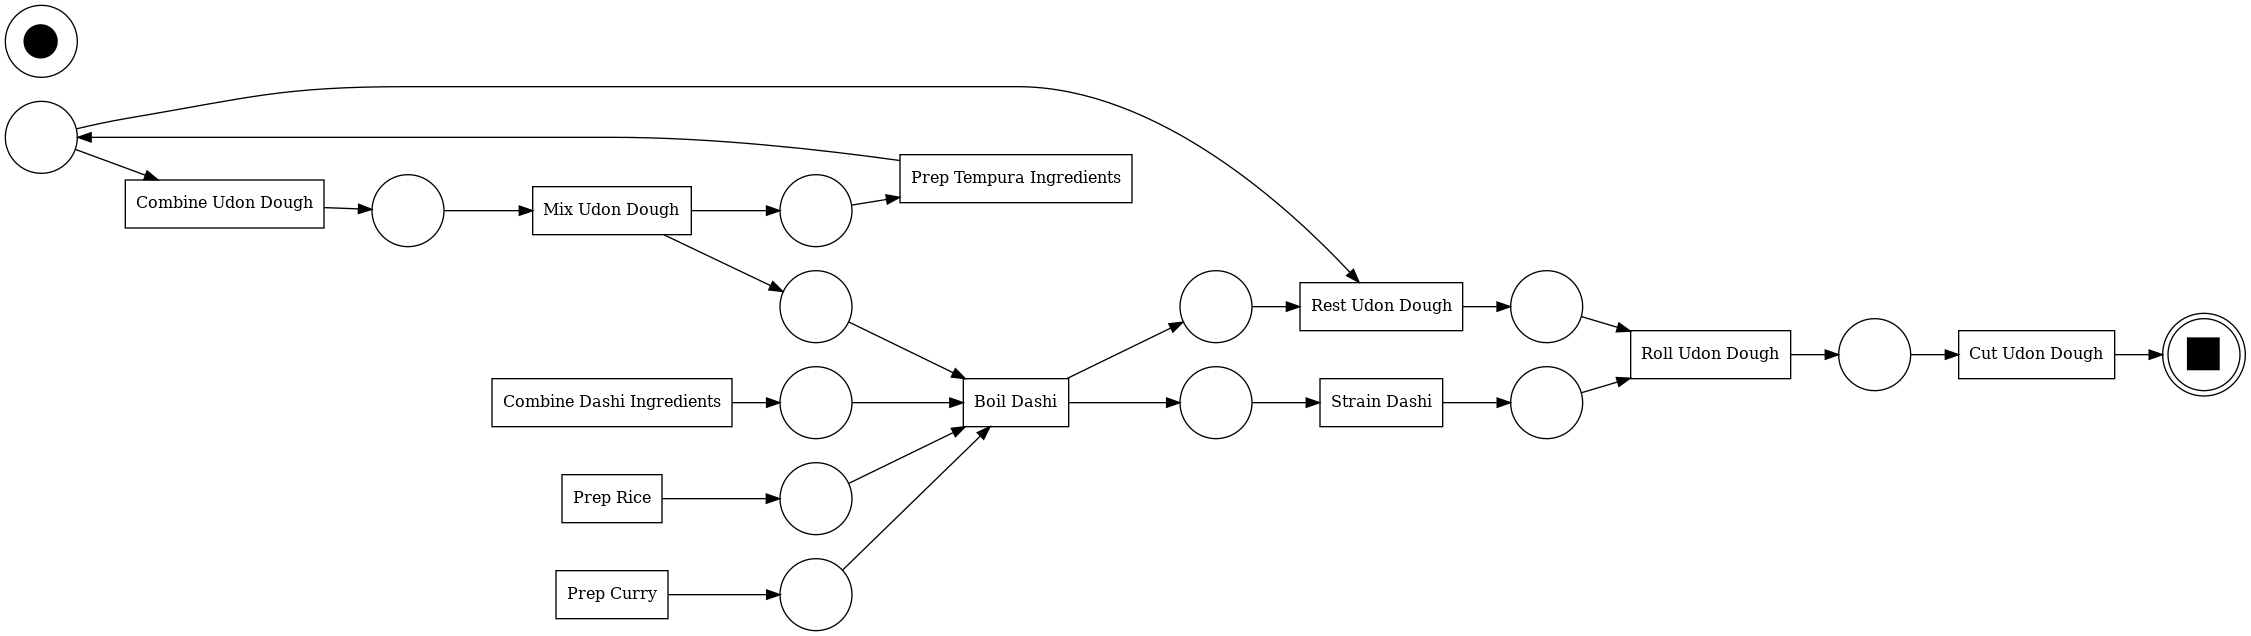

In [15]:
net, im, fm = pm4py.discover_petri_net_alpha(ingredient_prep_log)
pm4py.view_petri_net(net, im, fm, format='png')

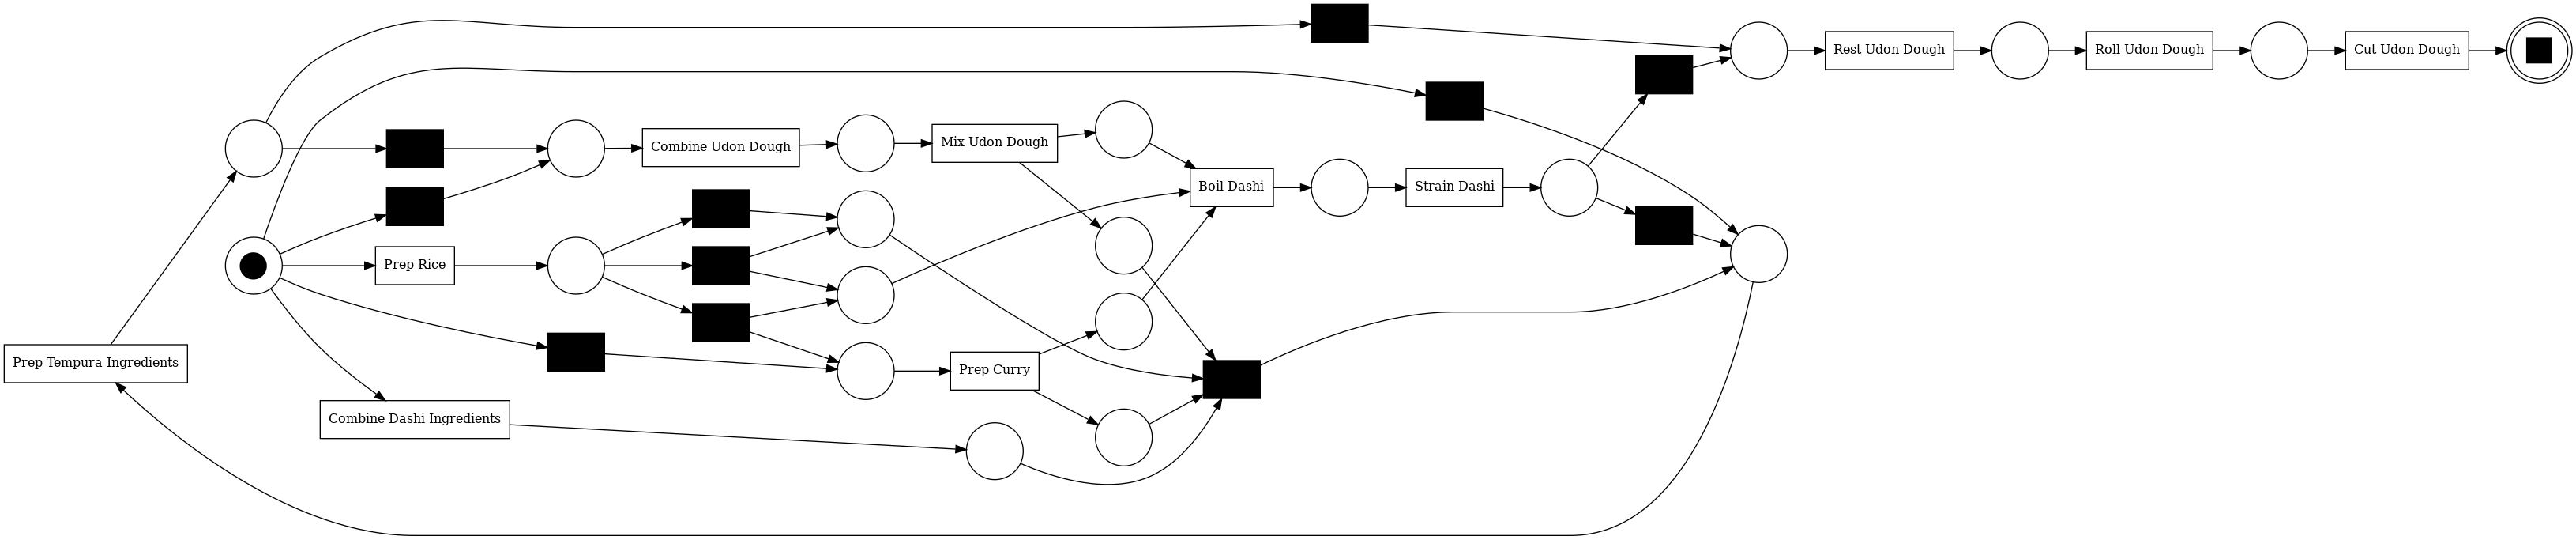

In [16]:
net, im, fm = pm4py.discover_petri_net_heuristics(ingredient_prep_log)
pm4py.view_petri_net(net, im, fm, format='png')

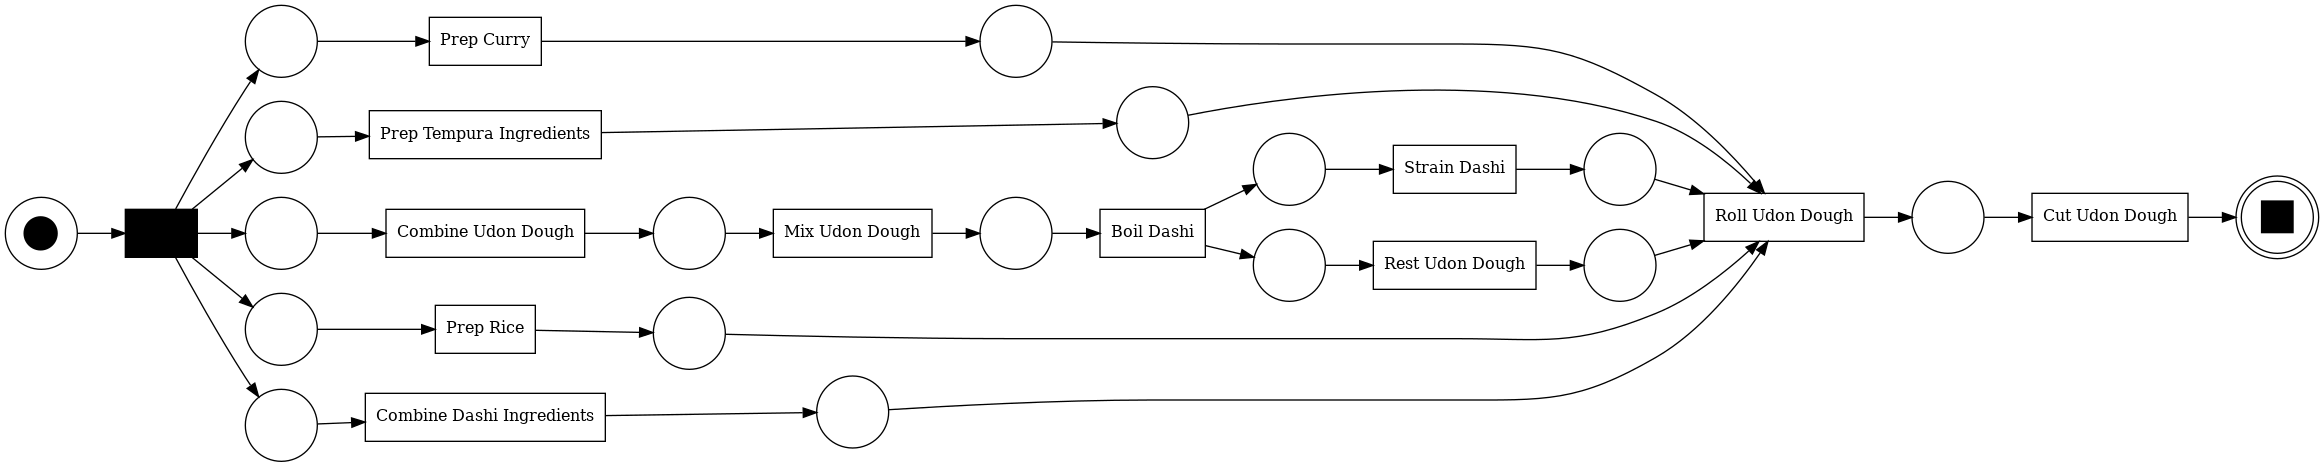

In [17]:
net, im, fm = pm4py.discover_petri_net_inductive(ingredient_prep_log)
pm4py.view_petri_net(net, im, fm, format='png')

discovering Petri net using ILP miner, completed causal relations :: 100%|█| 19/


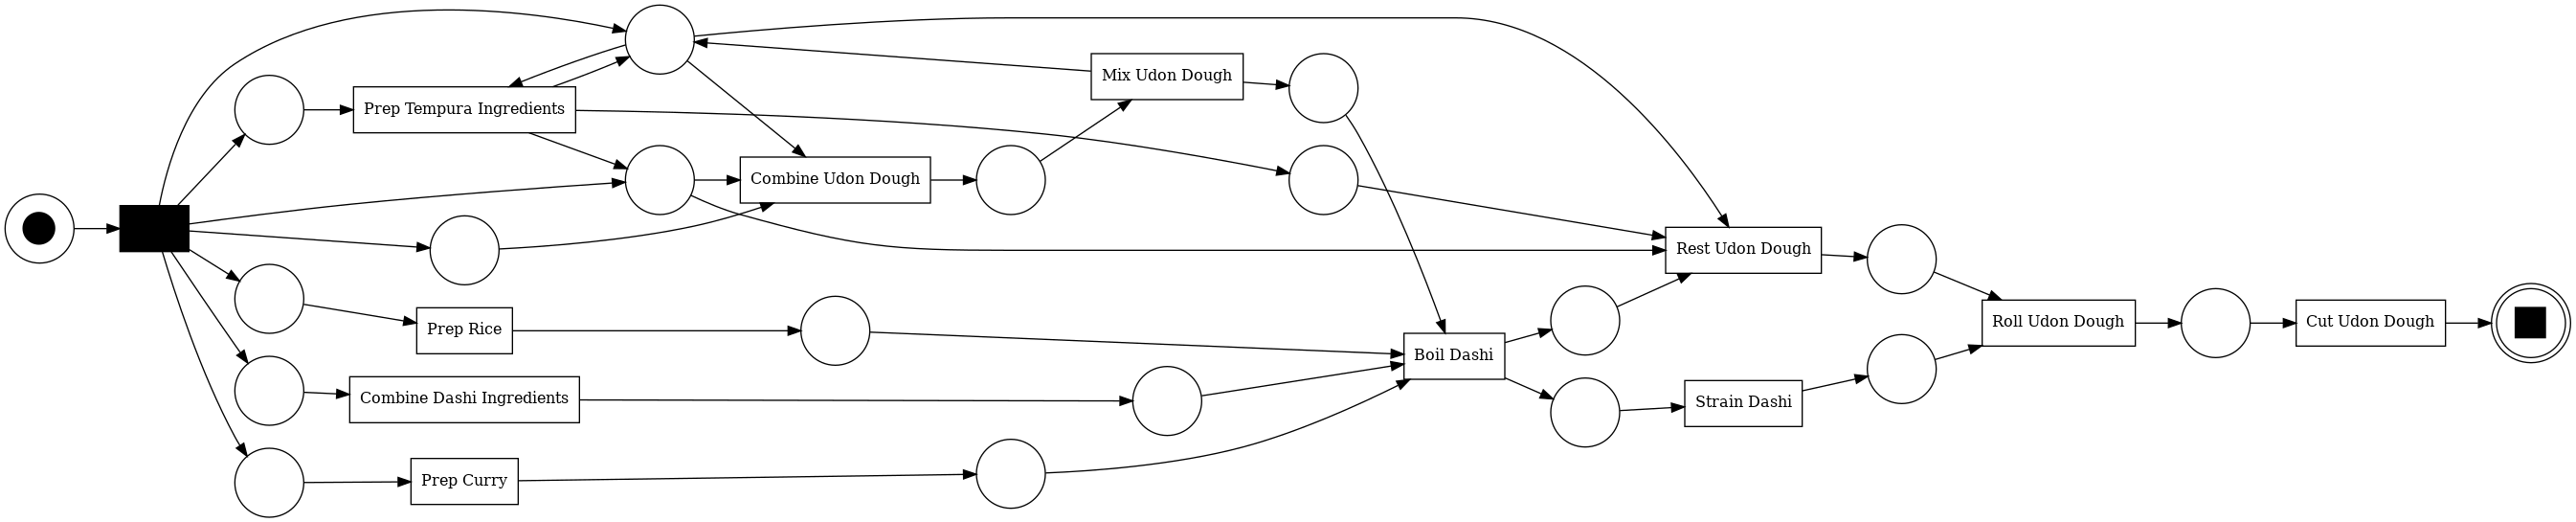

In [18]:
net, im, fm = pm4py.discover_petri_net_ilp(ingredient_prep_log)
pm4py.view_petri_net(net, im, fm, format='png')